<h1 style="color:green" align="center"><b> Marketing Segmentation on Banking Dataset By Clustering</b> </h1>

### **Objective :**
For this particular casestudy, the task involves formulating customer segmentation to offer tailored recommendations, including savings plans, loans, wealth management, and other relevant services, to specific groups of customers.

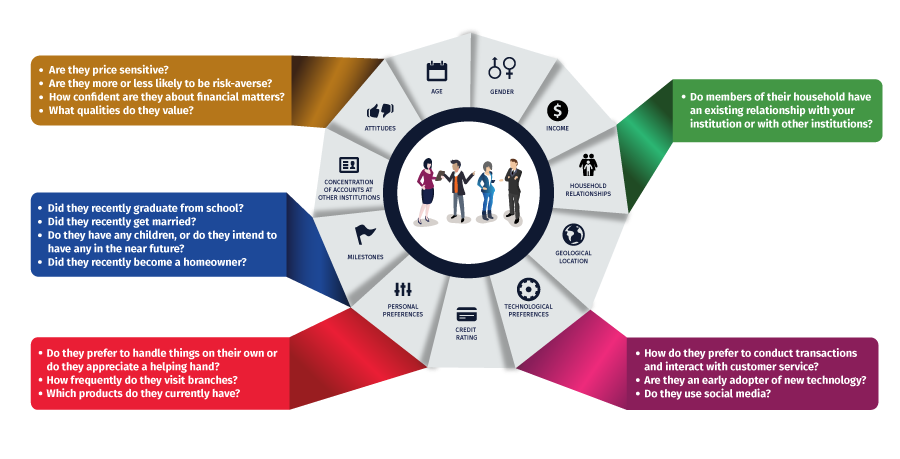

### **Data Description :**
The dataset provided contains information on the usage behavior of approximately 9000 active credit card holders over the past 6 months. The data is structured at a customer level and comprises 18 behavioral variables.
### **Data :**  
Use the below link to download the Data Set:[here](https://www.kaggle.com/arjunbhasin2013/ccdata)

### **Attribute Information :**
The attribute information, or data dictionary, for the customer's credit card dataset is as follows:

[Provide details of the attributes and their meanings here.]

<b> CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
df = pd.read_csv("/content/CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

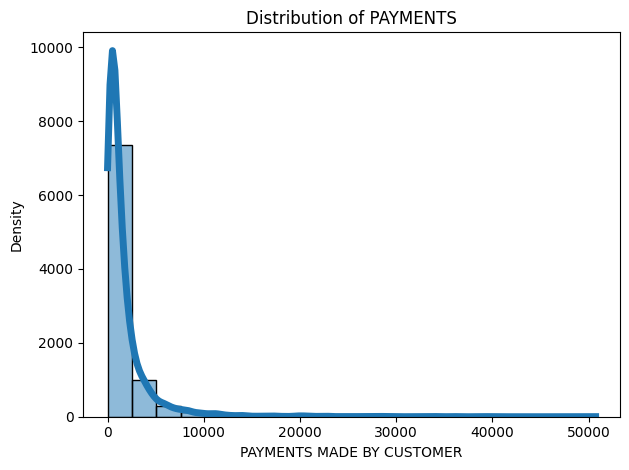

In [ ]:
sns.histplot(df['PAYMENTS'], bins=20, kde=True, line_kws={'linewidth': 5})
plt.xlabel('PAYMENTS MADE BY CUSTOMER')
plt.ylabel('Density')
plt.title('Distribution of PAYMENTS')
plt.tight_layout()

plt.show()

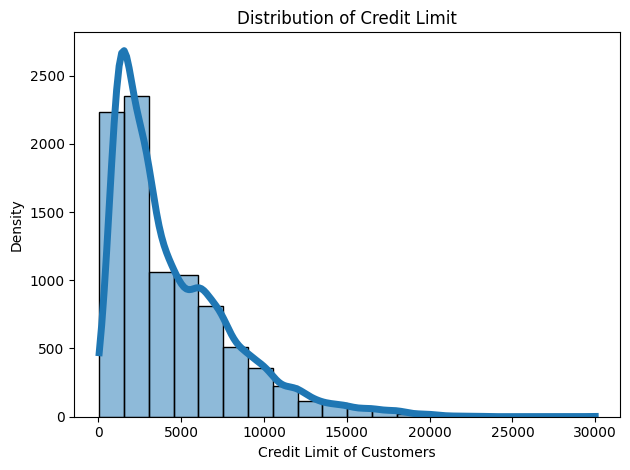

In [ ]:
sns.histplot(df['CREDIT_LIMIT'], bins=20, kde=True, line_kws={'linewidth': 5})
plt.xlabel('Credit Limit of Customers')
plt.ylabel('Density')
plt.title('Distribution of Credit Limit')
plt.tight_layout()

plt.show()

In [ ]:
# fill mean value in place of missing values
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# checking duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
# dropping irrelevant columns
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

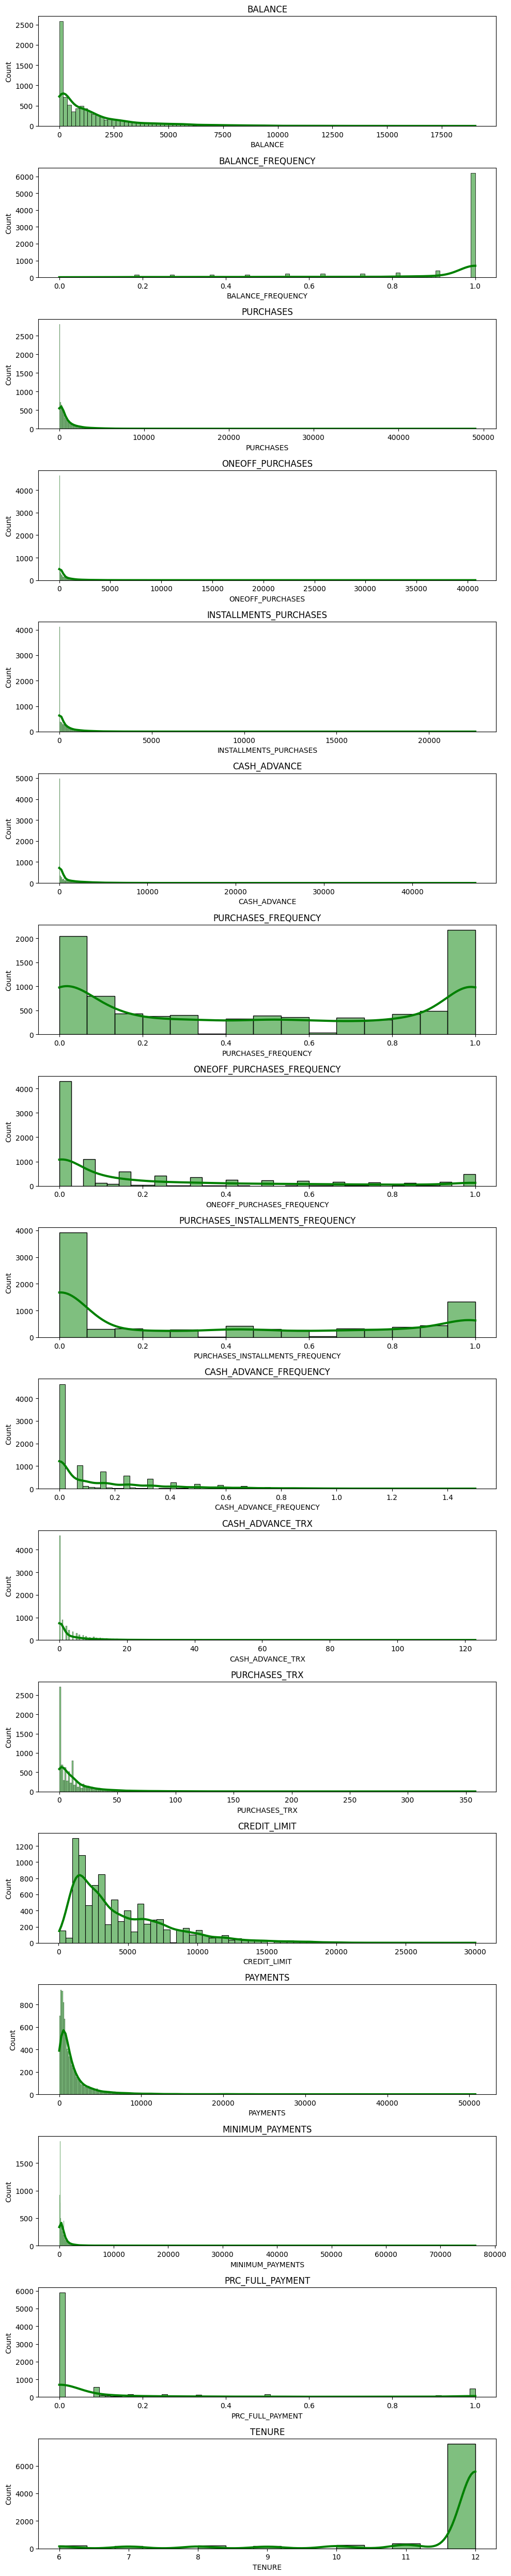

In [ ]:
plt.figure(figsize=(10, 50))
columns = df.columns

for i in range(len(columns)):
    plt.subplot(len(columns), 1, i+1)
    sns.histplot(df[columns[i]], kde=True, color='g', line_kws={"linewidth": 3})
    plt.title(columns[i])

plt.tight_layout()
plt.show()

In [ ]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = df[i].quantile(0.95)
  min_thresold = df[i].quantile(0.05)
  creditcard_df_no_outlier = df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((df.shape[0]-creditcard_df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [ ]:
# Calculate the quantiles for columns with potential outliers
max_thresold_BALANCE = df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.05)

# Filter the DataFrame to exclude rows with outliers
df_no_outlier = df[
    (df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) &
    (df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) &
    (df["BALANCE"] < max_thresold_BALANCE) &
    (df["BALANCE"] > min_thresold_BALANCE) &
    (df["PAYMENTS"] < max_thresold_PAYMENTS) &
    (df["PAYMENTS"] > min_thresold_PAYMENTS)
]

In [ ]:
df_no_outlier.shape

(6466, 17)

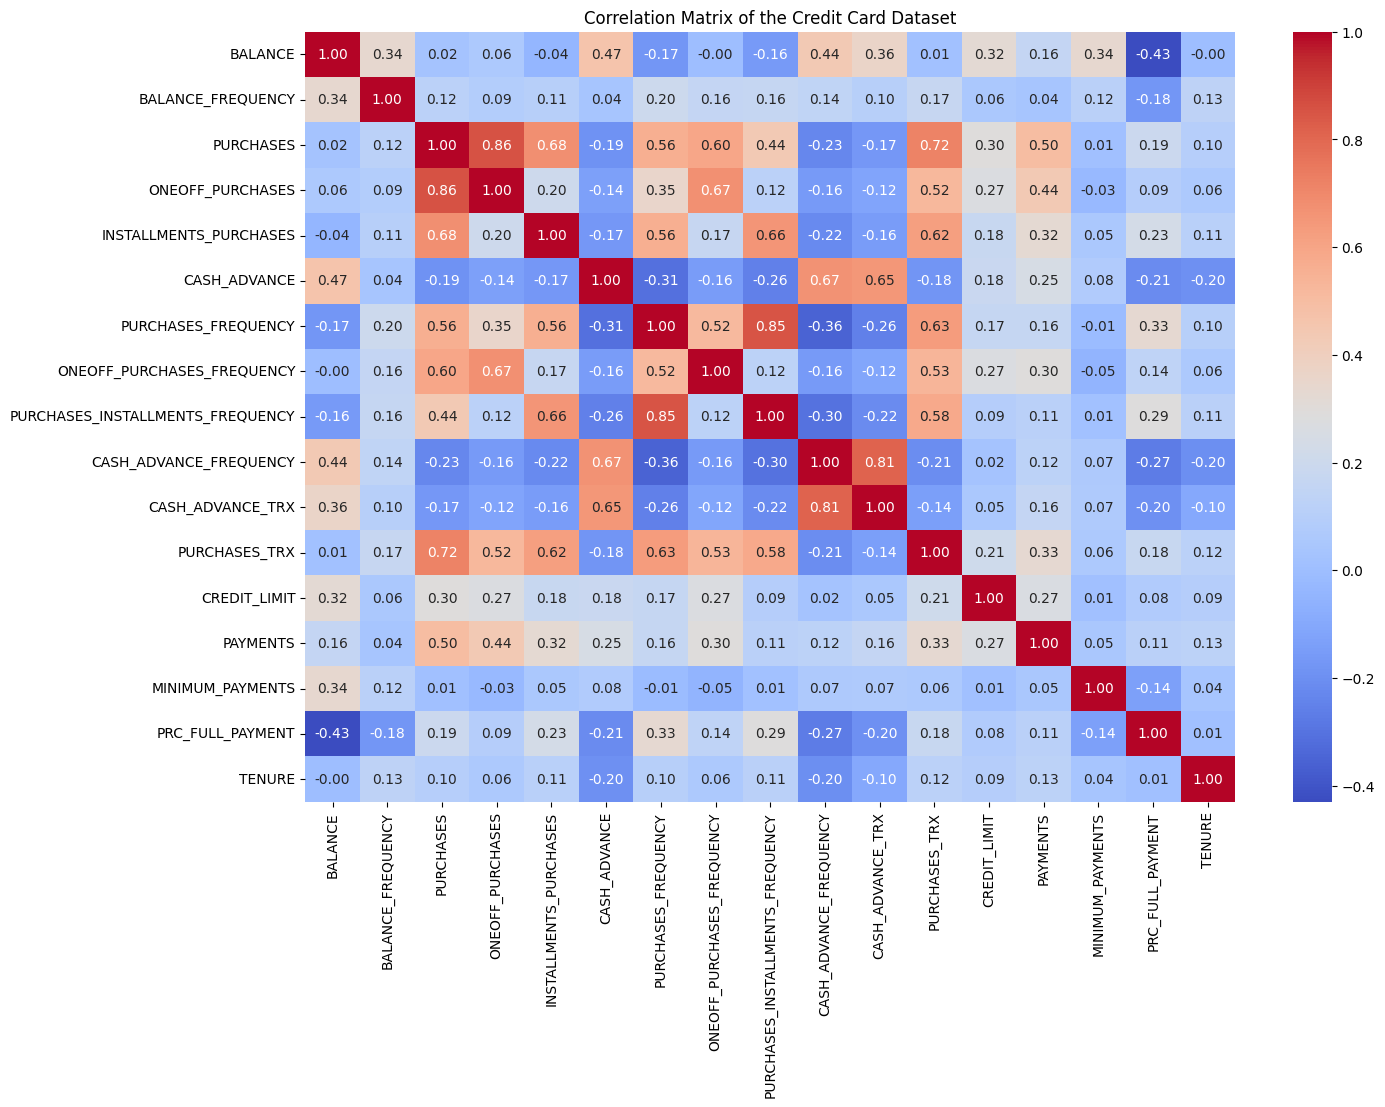

In [ ]:
#correlation-matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df_no_outlier.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix of the Credit Card Dataset')
plt.show()

In [ ]:
# scale the DataFrame
sc=StandardScaler()
creditcard_scaled_df = sc.fit_transform(df_no_outlier)

explained_variance_ratio:
Component 1: 0.40
Component 2: 0.22
Component 3: 0.15
Component 4: 0.11
Component 5: 0.06
Component 6: 0.03
Component 7: 0.02
Component 8: 0.00
Component 9: 0.00
Component 10: 0.00
Component 11: 0.00
Component 12: 0.00
Component 13: 0.00
Component 14: 0.00
Component 15: 0.00
Component 16: 0.00
Component 17: 0.00


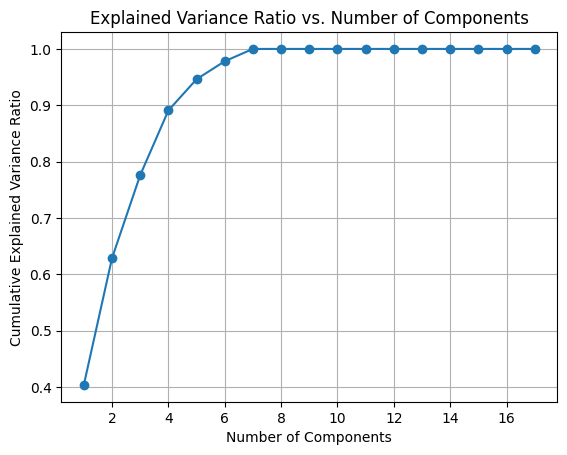

In [ ]:
from sklearn.decomposition import PCA

# Assuming creditcard_scaled_df contains the scaled DataFrame for PCA
n_components = len(df_no_outlier.columns)  # Maximum number of components

pca = PCA(n_components=n_components)
principal_comp = pca.fit_transform(df_no_outlier)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("explained_variance_ratio:")
for i in range(len(explained_variance_ratio)):
    print(f"Component {i+1}: {explained_variance_ratio[i]:.2f}")

# Plotting the cumulative explained variance ratio
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

### We have the highest value of Explained Variance Ratio as 2 number of Components, Hence the number of principal component = 2

In [ ]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.286527,3.003712
1,1.134711,0.432065
2,-1.458101,-1.493200
3,0.740698,-0.539435
4,0.648377,-1.077217


<h1 style="color:green" align="center"><b> Finding the optimal number of Cluster for Segmentation using
Elbow Method </b>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

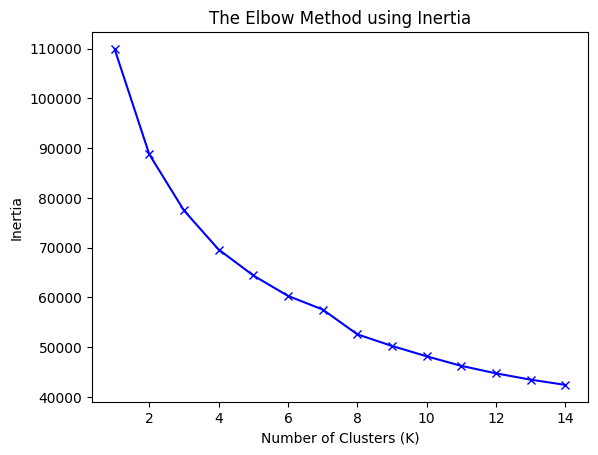

In [ ]:
from sklearn.cluster import KMeans

inertia = []
range_val = range(1, 15)
for k in range_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pd.DataFrame(creditcard_scaled_df))
    inertia.append(kmeans.inertia_)

# Plotting the inertia values against the number of clusters (K)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
range_val = range(2, 10)

# Looping through different values of K
for k in range_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pd.DataFrame(creditcard_scaled_df))
    labels = kmeans.labels_
    # Calculating the silhouette score for each value of K
    score = silhouette_score(pd.DataFrame(creditcard_scaled_df), labels)
    silhouette_scores.append(score)
    print(silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626, 0.1882068956304229]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626, 0.1882068956304229, 0.19891858053225966]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626, 0.1882068956304229, 0.19891858053225966, 0.20378617895141996]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626, 0.1882068956304229, 0.19891858053225966, 0.20378617895141996, 0.21491129365618983]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.21169692981854868, 0.1888255745091118, 0.1754986824501626, 0.1882068956304229, 0.19891858053225966, 0.20378617895141996, 0.21491129365618983, 0.21479762288435805]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


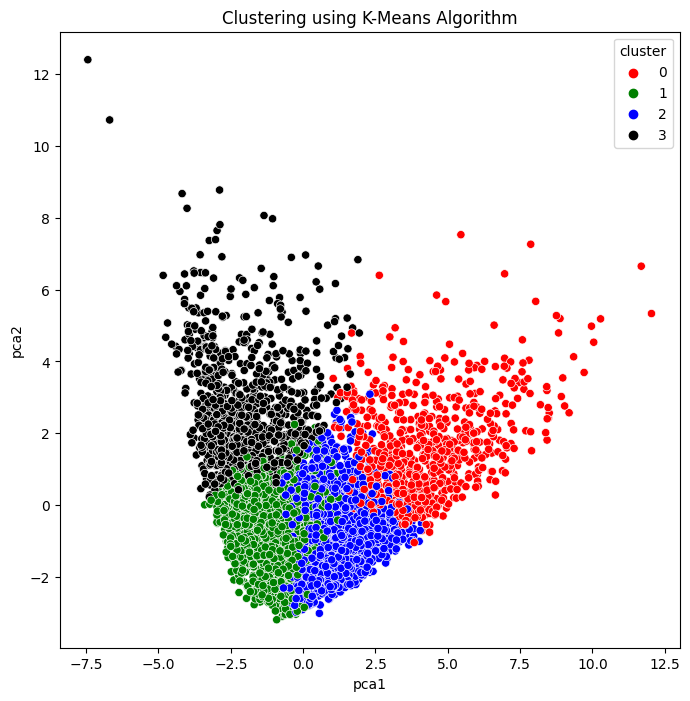

In [ ]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [ ]:
# GaussianMixture Model based clustering
clusters=[2,3,4,5,6]
for i in clusters:
  train_GaussianMixture(i,creditcard_scaled_df)

GaussianMixture Model based Clustering : clusters :  2  silhouette_score :  0.18592272133748544
GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.11605827583746624
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.10086205767167115
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.06262035016678309
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.01713074895907957


<ipython-input-29-67a1dc1696b0>:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue','black'])


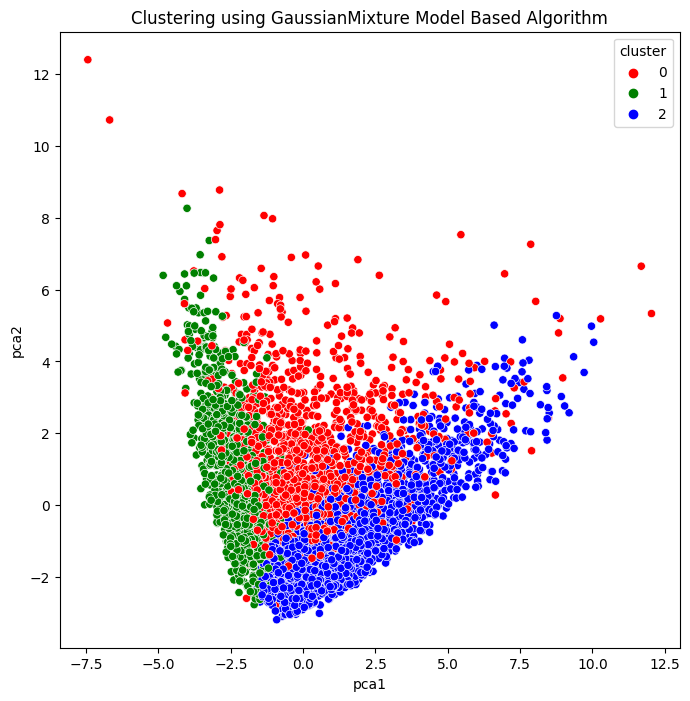

In [ ]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(creditcard_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue','black'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

In [ ]:
# Finding the cluster centers
cluster_centers = GaussianMixture_model.means_

# Inverse transforming the cluster centers to the original scale
cluster_centers = sc.inverse_transform(cluster_centers)

# Creating a DataFrame to store the cluster centers
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=df.columns)

# cluster_centers_df will now contain the cluster centers in the original scale
cluster_centers_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2045.560618,0.960857,1127.121819,632.612748,4.958786e+02,1.390834e+03,0.646857,0.275919,4.706417e-01,2.456269e-01,5.958143e+00,19.771609,4150.743179,1718.072669,1703.114587,0.068701,11.536109
1,1771.315834,0.915101,47.555735,47.555735,6.821210e-13,1.501658e+03,0.036323,0.036323,4.996004e-16,2.470647e-01,5.273674e+00,0.502053,3535.263984,1132.988832,592.878783,0.023422,11.394787
2,707.788891,0.890241,1242.800020,702.357967,5.404421e+02,3.410605e-12,0.712985,0.292076,5.336746e-01,6.106227e-16,1.376677e-14,19.543041,4346.304978,1251.533041,327.233199,0.276269,11.739714


In [ ]:
cluster_labels = GaussianMixture_model.predict(creditcard_scaled_df)

# Concatenate the cluster labels to the original DataFrame
creditcard_cluster_df = pd.concat([df, pd.DataFrame({'cluster': cluster_labels})], axis=1)

# creditcard_cluster_df will now contain the original data along with the 'cluster' column
creditcard_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0


In [ ]:
creditcard_cluster_df['cluster'].value_counts()

2.0    2983
1.0    2025
0.0    1458
Name: cluster, dtype: int64

In [ ]:
cluster_1_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==0]
cluster_1_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,0.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.0,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12,0.0
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.0,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12,0.0
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.5,0.166667,4,11,8000.0,1993.439277,2109.906490,0.0,12,0.0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.0,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12,0.0


In [ ]:
cluster_2_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==1]
cluster_2_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.00,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.00,12,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,1.0
11,630.794744,0.818182,1492.18,1492.18,0.00,0.0,0.250000,0.25,0.000000,0.0,0,6,2000.0,705.618627,155.549069,0.00,12,1.0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,1.0
17,41.089489,0.454545,519.00,0.00,519.00,0.0,0.416667,0.00,0.333333,0.0,0,8,2500.0,254.590662,73.203221,0.25,12,1.0


In [ ]:
cluster_3_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==2]
cluster_3_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12,2.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12,2.0


In [ ]:
# Calculate the mean of all attributes for each cluster DataFrame
cluster_1_mean = cluster_1_df.mean()
cluster_2_mean = cluster_2_df.mean()
cluster_3_mean = cluster_3_df.mean()

# Print the means
print("Cluster 1 Mean:")
print(cluster_1_mean)

print("\nCluster 2 Mean:")
print(cluster_2_mean)

print("\nCluster 3 Mean:")
print(cluster_3_mean)

Cluster 1 Mean:
BALANCE                             1834.126502
BALANCE_FREQUENCY                      0.889507
PURCHASES                           1131.427771
ONEOFF_PURCHASES                     709.592867
INSTALLMENTS_PURCHASES               422.277675
CASH_ADVANCE                        1139.557018
PURCHASES_FREQUENCY                    0.500044
ONEOFF_PURCHASES_FREQUENCY             0.247671
PURCHASES_INSTALLMENTS_FREQUENCY       0.352285
CASH_ADVANCE_FREQUENCY                 0.138720
CASH_ADVANCE_TRX                       3.432785
PURCHASES_TRX                         15.781207
CREDIT_LIMIT                        5344.390756
PAYMENTS                            1971.055972
MINIMUM_PAYMENTS                     927.464210
PRC_FULL_PAYMENT                       0.155577
TENURE                                11.617284
cluster                                0.000000
dtype: float64

Cluster 2 Mean:
BALANCE                             1856.664579
BALANCE_FREQUENCY                      0

<h1 style="color:green" align="center"><b> FINAL FINDINGS</b> </h1>

Cluster 1:

1. Customers in Cluster 1 have relatively high
'BALANCE,' 'PURCHASES,' 'ONEOFF_PURCHASES,' and 'CREDIT_LIMIT.'
2. They also have a moderate 'PURCHASES_FREQUENCY' and 'PURCHASES_TRX' (number of purchase transactions).
3. The 'CASH_ADVANCE' is moderate, indicating some cash advance usage.

This cluster represents customers who use their credit cards frequently for purchases, including both one-off and installment purchases, and tend to maintain a higher credit balance.

Cluster 2:

1. Customers in Cluster 2 have similar mean values for most attributes to those in Cluster 1, but with slightly lower 'BALANCE' and 'CREDIT_LIMIT.'
2. They also show similar purchase behaviors with moderate 'PURCHASES_FREQUENCY' and 'PURCHASES_TRX.'
3. The 'CASH_ADVANCE' usage is again moderate.

This cluster represents customers who exhibit similar purchase behaviors to those in Cluster 1 but with slightly lower credit limits and balances.

Cluster 3:

1. Customers in Cluster 3 have slightly lower 'BALANCE' and 'CREDIT_LIMIT' compared to both Cluster 1 and 2.
2. Their 'PURCHASES' and 'ONEOFF_PURCHASES' are higher compared to Cluster 2 but lower than Cluster
'PURCHASES_FREQUENCY' and 'PURCHASES_TRX' are moderate.
3. The 'CASH_ADVANCE' usage is similar to the other clusters.

This cluster represents customers with a more balanced purchase behavior, making moderate purchases and using their credit cards and cash advances more prudently.